<a href="https://colab.research.google.com/github/FINUSAM/Beginner-ML-Projects/blob/main/house_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports dataset

In [35]:
import pandas as pd

In [36]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [56]:
housing.data.shape

(20640, 8)

In [57]:
housing.target.shape

(20640,)

In [58]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
Y = pd.DataFrame(housing.target, columns=['Price'])
dataset = pd.concat([X, Y], axis=1)

X.shape, Y.shape

((20640, 8), (20640, 1))

In [74]:
dataset.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


Scaled

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

In [59]:
X = pd.DataFrame(scaled_X, columns=housing.feature_names)
X.shape

(20640, 8)

correlation

In [51]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


train test split

In [52]:
from sklearn.model_selection import train_test_split

In [60]:
Y.shape

(20640, 1)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

In [64]:
X.shape, X_train.shape, X_test.shape

((20640, 8), (16512, 8), (4128, 8))

Model

In [65]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [66]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluation on training data

In [123]:
from sklearn.metrics import r2_score
prediction = model.predict(X_train)
r2_score(Y_train, prediction)

0.943650140819218

In [124]:
from sklearn.metrics import mean_absolute_error
prediction = model.predict(X_train)
mean_absolute_error(Y_train, prediction)

0.1933648700612105

evaluation on testing data

In [125]:
prediction = model.predict(X_test)
print(r2_score(Y_test, prediction))
print(mean_absolute_error(Y_test, prediction))

0.8338000331788725
0.3108631800268186


visualising the prediction

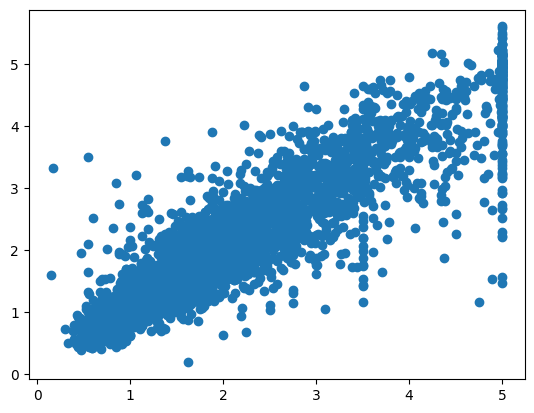

In [126]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, prediction)
plt.show()

creating a system for prediction house price

In [115]:
data = [2.3886,	16.0,	5.254717,	1.162264,	1387.0,	2.616981,	39.37,	-121.24,	0.894]
input = pd.DataFrame([data[:-1]], columns=housing.feature_names)
output = pd.DataFrame([data[-1]], columns=['Price'])

In [116]:
input.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [117]:
scaled_input = scaler.transform(input)

In [118]:
prediction = model.predict(scaled_input)

In [119]:
print(output, prediction)

   Price
0  0.894 [0.98596084]


In [120]:
#evaluation
print(mean_absolute_error(output, prediction))

0.09196084117889403
